# SIN Stock Trading Game

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplots
import yfinance as yf
from datetime import date
from sklearn.preprocessing import MinMaxScaler
from matplotlib.dates import DateFormatter

# Importing defined functions

from Functions import stock_df_create
from Functions import get_current_weights
from Functions import rebalance_portfolio
from Functions import additional_cash_investments

## 1 - Dataframe creation and stock selection

In [20]:
tkr_list = ['BTI', 'BYD', 'MO', 'SAM', 'STZ', 'LMT', 'LVS',
            'TAP', 'TDG', 'PEP', 'NOC', 'MGM', 'GD', 'BUD', 
            'BAESY', 'BDRBF', 'MNST', 'WYNN', 'RRR', 'RTX',
            'PM', 'CZR', 'HO.PA', 'RHM.DE', 'AIR', 'HEI', 'GTBIF',
            'CURLF', 'DKNG']

In [21]:
df = stock_df_create(tkr_list, start_date="2024-03-15", end_date="2024-04-15")
df.sort_values(by="TKR")

[*********************100%%**********************]  1 of 1 completed


[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%******

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE
24,AIR,,2182309376,-0.010096,-0.032776,60.790001
14,BAESY,,50821402624,-0.024009,-0.011782,66.260002
15,BDRBF,,4096651520,-0.028298,0.049544,42.580002
0,BTI,,64435408896,-0.033108,-0.055445,28.620001
13,BUD,,117241610240,-0.021514,-0.035033,58.669998
1,BYD,,6259836928,-0.026161,0.043760,64.400002
27,CURLF,,3521000704,-0.137500,-0.026210,4.830000
21,CZR,,8854241280,-0.065486,0.023743,40.099998
28,DKNG,,21246113792,-0.063136,0.058401,44.220001
12,GD,,79317041152,-0.024765,0.046001,287.869995


## 2 - Stock Weighting and Portfolio Construnction

### 2.1 Assigning Size and Momentum scores

In [22]:
scaler = MinMaxScaler()

market_cap_values = df['MKT_CAP'].values.reshape(-1, 1)
weekly_return_values = df['W_RET'].values.reshape(-1, 1)
monthly_return_values = df['M_RET'].values.reshape(-1,1)

df['Size_Score'] = scaler.fit_transform(market_cap_values)
df['W_Mom_Score'] = scaler.fit_transform(weekly_return_values)
df['M_Mom_Score'] = scaler.fit_transform(monthly_return_values)

### 2.2 Defining Scores Importance

In [23]:
mkt_cap_weight = 0.3
w_mom_weight = 0.3
m_mom_weight = 0.4

In [24]:
df['Overall_Score'] = (df['Size_Score'] * mkt_cap_weight) + (df['W_Mom_Score'] * w_mom_weight) + (df['M_Mom_Score'] * m_mom_weight)
df.sort_values(by="TKR")

,TKR,LAST_PRRICE,MKT_CAP,W_RET,M_RET,LAST_PRICE,Size_Score,W_Mom_Score,M_Mom_Score,Overall_Score
24,AIR,,2182309376,-0.010096,-0.032776,60.790001,0.000000,0.841474,0.205166,0.334509
14,BAESY,,50821402624,-0.024009,-0.011782,66.260002,0.212771,0.749579,0.280448,0.400884
15,BDRBF,,4096651520,-0.028298,0.049544,42.580002,0.008374,0.721257,0.500355,0.419032
0,BTI,,64435408896,-0.033108,-0.055445,28.620001,0.272326,0.689485,0.123878,0.338094
13,BUD,,117241610240,-0.021514,-0.035033,58.669998,0.503326,0.766058,0.197075,0.459645
1,BYD,,6259836928,-0.026161,0.043760,64.400002,0.017837,0.735372,0.479615,0.417809
27,CURLF,,3521000704,-0.137500,-0.026210,4.830000,0.005856,0.000000,0.228713,0.093242
21,CZR,,8854241280,-0.065486,0.023743,40.099998,0.029186,0.475636,0.407835,0.314581
28,DKNG,,21246113792,-0.063136,0.058401,44.220001,0.083394,0.491160,0.532116,0.385213
12,GD,,79317041152,-0.024765,0.046001,287.869995,0.337425,0.744592,0.487651,0.519666


### 2.3 Portfolio Construction

In [25]:
df['Weights_new'] = df['Overall_Score'] / df['Overall_Score'].sum()

Optimal_new_weights = df[['TKR', 'Weights_new', 'LAST_PRICE']]
Optimal_new_weights.sort_values(by="TKR")

,TKR,Weights_new,LAST_PRICE
24,AIR,0.027384,60.790001
14,BAESY,0.032818,66.260002
15,BDRBF,0.034303,42.580002
0,BTI,0.027677,28.620001
13,BUD,0.037628,58.669998
1,BYD,0.034203,64.400002
27,CURLF,0.007633,4.830000
21,CZR,0.025753,40.099998
28,DKNG,0.031535,44.220001
12,GD,0.042541,287.869995


### 2.4 Visual Representation

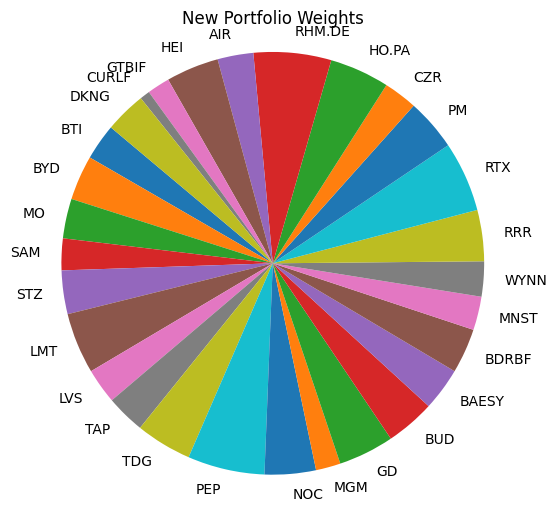

In [26]:
plt.figure(figsize=(6, 6))
plt.pie(Optimal_new_weights['Weights_new'], labels=Optimal_new_weights['TKR'], startangle=140)
plt.title('New Portfolio Weights')
plt.axis('equal') 

plt.show()

## 3 - Portfolio Rebalancing

In [27]:
Cur_port = pd.read_csv("OpenPosition_4_15_2024.csv", header=0)
Cur_port.rename(columns={'Symbol': 'TKR'}, inplace=True)
Cur_port

,TKR,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage
0,AIR,European Aeronautic Defence and Space NV,152,EUR,162.9000,169.509737,0.64,"-1,004.68",24760.800000,-3.90
1,BAESY,BAE Systems plc - ADR,559,USD,67.3000,68.647448,1.04,-707.80,35352.152382,-1.96
2,BDRBF,Bombardier Inc. - Ordinary Shares - Class B (S...,949,USD,41.7400,42.296721,-0.84,-496.47,37222.680587,-1.32
3,BTI,British American Tobacco Plc - ADR,790,USD,28.6050,30.966214,-0.02,"-1,752.88",21235.281957,-7.63
4,BUD,Anheuser-Busch In Bev SA/NV - ADR,528,USD,58.3100,60.371988,-0.36,"-1,023.08",28931.167013,-3.42
5,BYD,Boyd Gaming Corp.,364,USD,65.2118,64.415730,0.81,272.30,22305.736114,1.24
6,CURLF,Curaleaf Holdings Inc,13383,USD,4.7500,5.285331,-0.08,"-6,732.32",59735.991430,-10.13
7,CZR,Caesars Entertainment Inc,485,USD,40.7700,41.159564,0.67,-177.55,18581.100764,-0.95
8,DKNG,DraftKings Inc - Ordinary Shares - Class A,1122,USD,44.5200,46.393915,0.30,"-1,975.75",46939.342398,-4.04
9,GD,General Dynamics Corp.,194,USD,288.1350,285.352439,0.27,507.27,52527.500305,0.98


In [28]:
Cur_weights = get_current_weights(Cur_port)
Cur_weights = pd.DataFrame(Cur_weights.items(), columns=['TKR', 'Weights_cur'])
Cur_weights.loc[Cur_weights['TKR'] == 'HO', 'TKR'] = 'HO.PA'
Cur_weights.loc[Cur_weights['TKR'] == 'RHM', 'TKR'] = 'RHM.DE'
Cur_weights

,TKR,Weights_cur
0,AIR,0.024103
1,BAESY,0.036621
2,BDRBF,0.038559
3,BTI,0.021997
4,BUD,0.029970
5,BYD,0.023106
6,CURLF,0.061880
7,CZR,0.019248
8,DKNG,0.048624
9,GD,0.054413


In [29]:
trades, num_trades, traded_amount = rebalance_portfolio(Cur_weights, Optimal_new_weights, Cur_port)
print(f'To rebalace the portfolio {num_trades} trades will be needed, and a cash amount of {traded_amount} is necessary.')

To rebalace the portfolio 11 trades will be needed, and a cash amount of -96143.59538592366 is necessary.


In [30]:
trades

,TKR,Weights_cur,Weights_new,LAST_PRICE,Description,Quantity,Currency,LastPrice,PricePaid,DayChange,ProfitLoss,MarketValue,ProfitLossPercentage,DollarAmount,DollarAmount_cur,DollarAmount_new,DollarAmount_diff,Shares_to_trade
6,CURLF,0.061880,0.007633,4.830000,Curaleaf Holdings Inc,13383.0,USD,4.750,5.285331,-0.08,"-6,732.32",59735.991430,-10.13,63569.250,63569.250,6960.875195,-56608.374805,-11918.0
8,DKNG,0.048624,0.031535,44.220001,DraftKings Inc - Ordinary Shares - Class A,1122.0,USD,44.520,46.393915,0.30,"-1,975.75",46939.342398,-4.04,49951.440,49951.440,28757.562262,-21193.877738,-476.0
9,GD,0.054413,0.042541,287.869995,General Dynamics Corp.,194.0,USD,288.135,285.352439,0.27,507.27,52527.500305,0.98,55898.190,55898.190,38794.983446,-17103.206554,-59.0
10,GTBIF,0.026471,0.017286,12.750000,Green Thumb Industries Inc - Ordinary Shares (...,2193.0,USD,12.400,13.332936,-0.35,"-1,922.56",25553.436011,-7.00,27193.200,27193.200,15763.353051,-11429.846949,-922.0
11,HEI,0.020473,0.040365,191.759995,Heineken NV,239.0,EUR,88.000,85.376904,0.18,626.92,21032.000000,3.07,21032.000,21032.000,36810.553322,15778.553322,179.0
15,MGM,0.028678,0.018892,42.480000,MGM Resorts International,683.0,USD,43.135,44.202388,0.66,-685.07,27684.679140,-2.41,29461.205,29461.205,17228.520035,-12232.684965,-284.0
16,MNST,0.007505,0.025637,55.009998,Monster Beverage Corp.,141.0,USD,54.680,60.582893,-0.33,-782.12,7244.970259,-9.74,7709.880,7709.880,23379.046035,15669.166035,287.0
18,NOC,0.015741,0.039153,456.109985,Northrop Grumman Corp.,35.0,USD,462.035,465.011299,5.93,-97.89,15196.091790,-0.64,16171.225,16171.225,35704.976015,19533.751015,42.0
23,RTX,0.065332,0.053659,100.099998,Raytheon Technologies Corporation,663.0,USD,101.230,95.314555,1.13,"3,685.44",63068.391328,6.21,67115.490,67115.490,48933.147027,-18182.342973,-180.0
24,SAM,0.011841,0.024233,285.649994,"Boston Beer Co., Inc. - Ordinary Shares - Class A",43.0,USD,282.900,306.393299,-2.75,-949.30,11431.162314,-7.67,12164.700,12164.700,22098.612193,9933.912193,35.0


In [31]:
trades[['TKR', 'Shares_to_trade']]

,TKR,Shares_to_trade
6,CURLF,-11918.0
8,DKNG,-476.0
9,GD,-59.0
10,GTBIF,-922.0
11,HEI,179.0
15,MGM,-284.0
16,MNST,287.0
18,NOC,42.0
23,RTX,-180.0
24,SAM,35.0


In [32]:
merged_port = pd.merge(Cur_port, trades[['TKR', 'Shares_to_trade']], on='TKR', how='left')
merged_port['Shares_to_trade'].fillna(0, inplace=True)
merged_port['New_Quantity'] = merged_port['Quantity'] + merged_port['Shares_to_trade']

updated_portfolio = merged_port[['TKR', 'New_Quantity', 'LastPrice']]
updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()

updated_portfolio

/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_7927/2842246680.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['DollarAmount'] = updated_portfolio['New_Quantity'] * updated_portfolio['LastPrice']
/var/folders/bz/jsngdqs55xxdjx6nm7z430l00000gn/T/ipykernel_7927/2842246680.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  updated_portfolio['uptd_Weights'] = updated_portfolio['DollarAmount'] / updated_portfolio['DollarAmount'].sum()


,TKR,New_Quantity,LastPrice,DollarAmount,uptd_Weights
0,AIR,152.0,162.9000,24760.8000,0.026594
1,BAESY,559.0,67.3000,37620.7000,0.040406
2,BDRBF,949.0,41.7400,39611.2600,0.042544
3,BTI,790.0,28.6050,22597.9500,0.024271
4,BUD,528.0,58.3100,30787.6800,0.033067
5,BYD,364.0,65.2118,23737.0952,0.025495
6,CURLF,1465.0,4.7500,6958.7500,0.007474
7,CZR,485.0,40.7700,19773.4500,0.021238
8,DKNG,646.0,44.5200,28759.9200,0.030889
9,GD,135.0,288.1350,38898.2250,0.041779


In [33]:
cash_rebalacing = additional_cash_investments(updated_portfolio, 95000)
cash_rebalacing

,TKR,Additional_Shares
0,AIR,15.0
1,BAESY,57.0
2,BDRBF,96.0
3,BTI,80.0
4,BUD,53.0
5,BYD,37.0
6,CURLF,149.0
7,CZR,49.0
8,DKNG,65.0
9,GD,13.0


### 3.1 - Rebalancing Drift

In [34]:
merged_df = pd.merge(Optimal_new_weights, updated_portfolio, on='TKR', suffixes=('_optimal', '_updated'))

mean_difference = np.mean(merged_df['Weights_new'] - merged_df['uptd_Weights'])

print(mean_difference)

0.0006991904347468424


A rebalancing drift of 0.058% is neglectable in the context of our portfolio management, indicating only a minor deviation from the target allocation. By implementing a weekly rebalancing strategy, we ensure that the portfolio weights remain consistently close to the desired allocation. While some minor rebalancing drift is inevitable due to market fluctuations, the frequency of rebalancing helps mitigate the impact of these deviations over time. 

Rebalancing Drifts data:

* 1st week: 0.058%
* 2nd week: 0.017%
* 3rd week: 0.005%

### 3.1 - Rebalancing Visualization

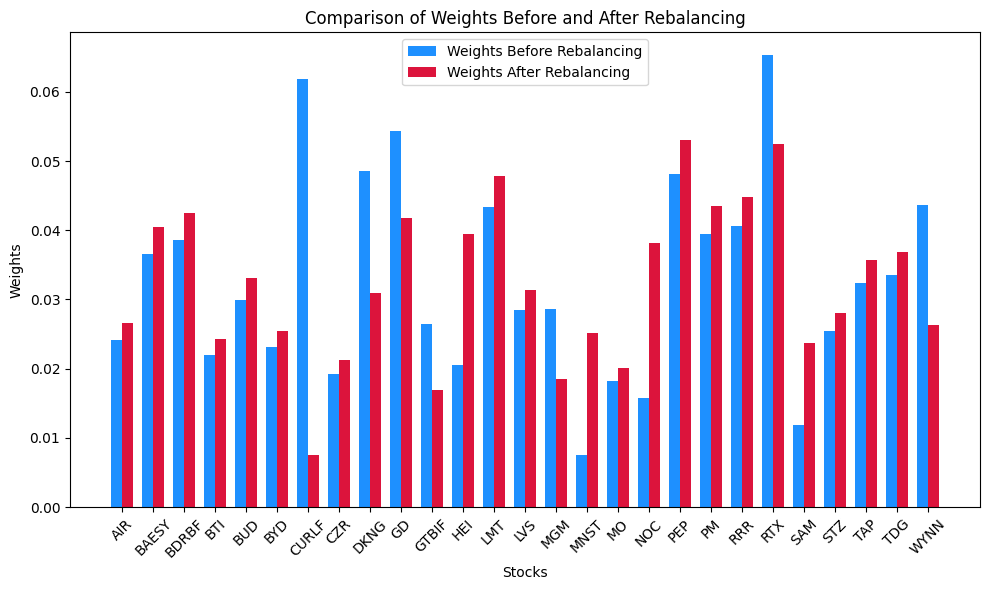

In [35]:
merged_weights = pd.merge(Cur_weights, updated_portfolio, on="TKR")

plt.figure(figsize=(10, 6))

bar_width = 0.35
index = np.arange(len(merged_weights))
tick_labels = merged_weights['TKR']

plt.bar(index, merged_weights['Weights_cur'], color='dodgerblue', width=bar_width, label='Weights Before Rebalancing')

plt.bar(index + bar_width, merged_weights['uptd_Weights'], color='crimson', width=bar_width, label='Weights After Rebalancing')

plt.xlabel('Stocks')
plt.ylabel('Weights')
plt.title('Comparison of Weights Before and After Rebalancing')
plt.xticks(index + bar_width / 2, tick_labels, rotation=45)
plt.legend()
plt.tight_layout()

plt.show()

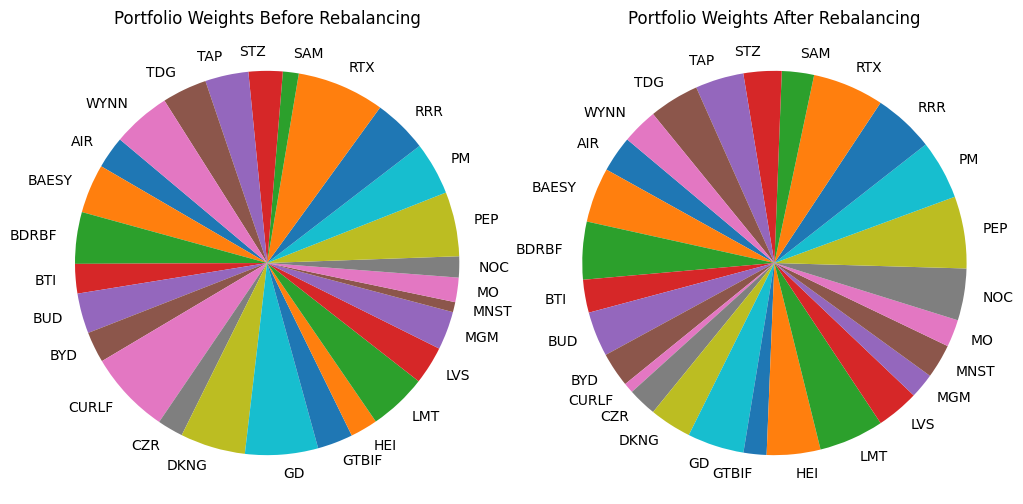

In [36]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].pie(merged_weights['Weights_cur'], labels=merged_weights['TKR'], startangle=140)
axs[0].set_title('Portfolio Weights Before Rebalancing')
axs[0].axis('equal')

axs[1].pie(merged_weights['uptd_Weights'], labels=merged_weights['TKR'], startangle=140)
axs[1].set_title('Portfolio Weights After Rebalancing')
axs[1].axis('equal')

plt.show()

## 4 - Performance Evaluation

[*********************100%%**********************]  1 of 1 completed


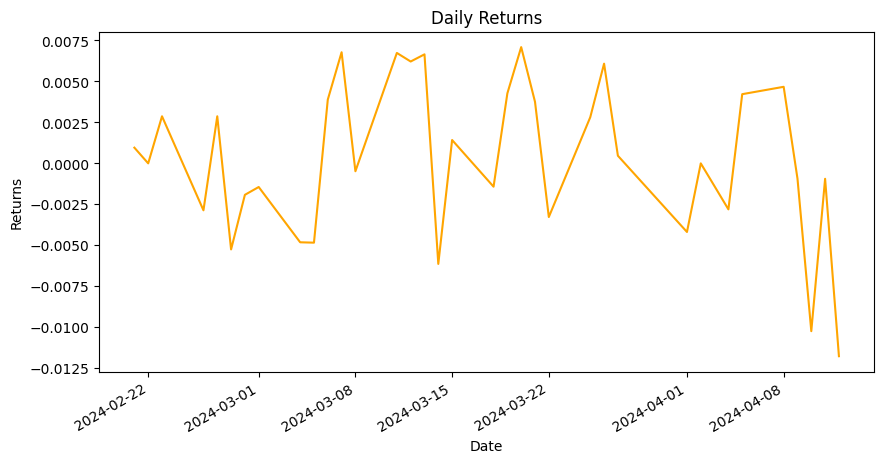

In [38]:
Benchmark = yf.download("VICEX", start="2024-02-19", end="2024-04-15") 
Benchmark['RET'] = Benchmark['Adj Close'].pct_change()

plt.figure(figsize=(10, 5))
plt.plot(Benchmark.index, Benchmark['RET'], color='orange', linestyle='-')
plt.title('Daily Returns')
plt.xlabel('Date')
plt.ylabel('Returns')

date_format = DateFormatter("%Y-%m-%d")
plt.gca().xaxis.set_major_formatter(date_format)
plt.gcf().autofmt_xdate()  # Rotate x-axis labels

plt.show()